<b><font size="5">Import relevant libraries and dataframes</font><a class="anchor"><a id='toc'></a></b>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
import sompy
from sompy.sompy import SOMFactory
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
wm_cleaned = pd.read_csv(r'WineMatters_cleaned.csv')
wm_cleaned.set_index('WineID', inplace = True)
wm_cleaned.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single,Satisfaction_General
WineID,,,,,,,,,,,,,,,,,,,,,
1,65,265,0,0.0,0,5,0,2,2,4,...,0,0,3,3,2,0,1,0,1,1
2,47,2464,310,305.0,4,2,0,3,0,2,...,0,0,4,3,2,1,0,0,1,1
3,15,2138,0,0.0,3,4,0,3,2,0,...,0,0,4,4,2,0,1,0,1,1
4,60,623,0,0.0,0,4,0,3,3,4,...,0,0,1,1,3,0,1,0,1,0
5,70,354,0,0.0,0,4,0,3,4,3,...,0,0,2,2,5,0,1,0,1,1


In [3]:
wm_scaled = pd.read_csv(r'WineMatters_scaled.csv')
wm_scaled.set_index('Unnamed: 0', inplace = True)
wm_scaled.index.rename('WineID', inplace=True)
wm_scaled.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single
WineID,,,,,,,,,,,,,,,,,,,,,
0,0.743590,0.034003,0.000000,0.000000,0.0,1.0,0.0,0.4,0.4,0.8,...,0.6,0.0,0.0,0.50,0.6,0.4,0.0,1.0,0.0,1.0
1,0.512821,0.381781,0.707763,0.693182,0.8,0.4,0.0,0.6,0.0,0.4,...,0.8,0.0,0.0,0.75,0.6,0.4,1.0,0.0,0.0,1.0
2,0.102564,0.330223,0.000000,0.000000,0.6,0.8,0.0,0.6,0.4,0.0,...,0.6,0.0,0.0,0.75,0.8,0.4,0.0,1.0,0.0,1.0
3,0.679487,0.090622,0.000000,0.000000,0.0,0.8,0.0,0.6,0.6,0.8,...,0.2,0.0,0.0,0.00,0.2,0.6,0.0,1.0,0.0,1.0
4,0.807692,0.048078,0.000000,0.000000,0.0,0.8,0.0,0.6,0.8,0.6,...,0.4,0.0,0.0,0.25,0.4,1.0,0.0,1.0,0.0,1.0


<b><font size="5">Segmentation of Variables after wm_scaled</font><a class="anchor"><a id='toc'></a></b>

There are two segmentation which will be used from now on using wm_scaled:
- flavor/ feeling
- production characteristics

In [4]:
# Definition of flavor/ feeling segmentation in wm_flavfeel
wm_flavfeel = wm_scaled[['Residual_Sugar', 'Acidity','Floral','Wood','Sweetness','Red_Fruit','Citric','Density','Cloudiness','Alcohol','Astringency']].copy()

In [5]:
# Definition of production characteristics segmentation in wm_prodchar
wm_prodchar = wm_scaled[['Aging_Time','Litters_Barrel','Type_White','Magnesium','Sulphites_Presence','Barrel_Wooden','Grapes_Single','Color_Intensity']].copy()

<b><font size="5">SOM - wm_flavfeel</font><a class="anchor"><a id='toc'></a></b>

In [6]:
wm_flavfeel_som = np.float32(wm_flavfeel.values)

In [7]:
rows = 25
cols = 25
mapsize = [rows, cols]

In [8]:
som_wm_flavfeel = SOMFactory().build(wm_flavfeel_som, mapsize, mask=None, 
                         mapshape='planar', 
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', 
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [9]:
# For more information about the trainig: verbose='info'
som_wm_flavfeel.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

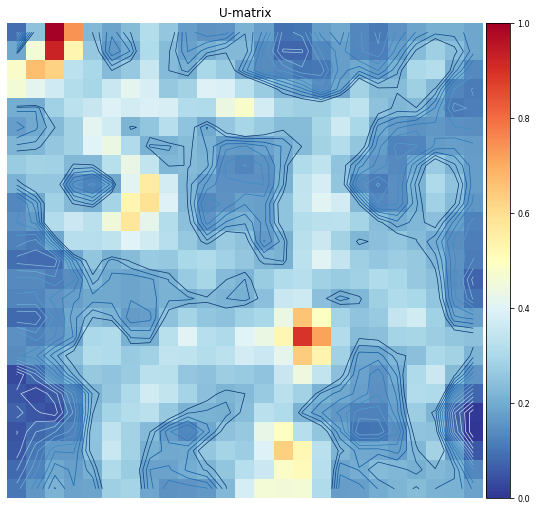

In [10]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som_wm_flavfeel, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som_wm_flavfeel, distance=1, row_normalized=True, contour=True, blob=False)

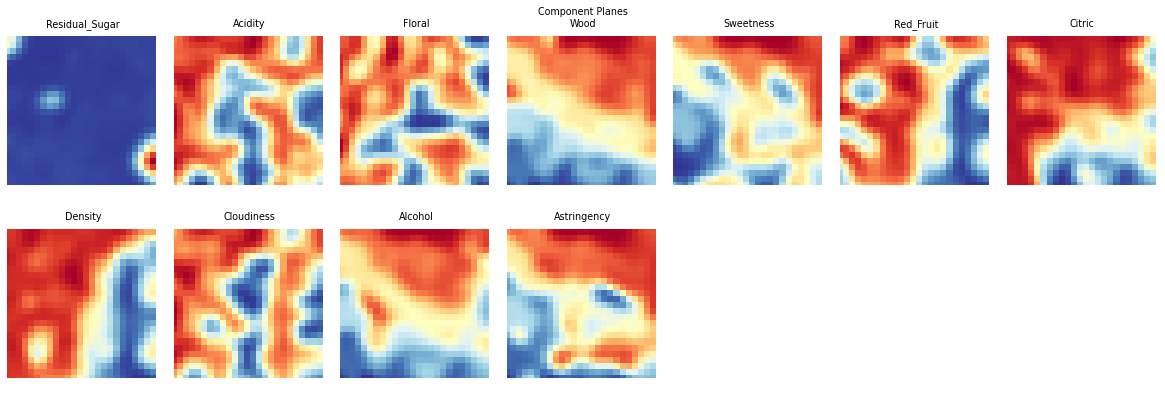

In [11]:
som_wm_flavfeel.component_names = wm_flavfeel.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, 'Component Planes', text_size=8)  
comp_planes.show(som_wm_flavfeel, what='codebook', which_dim='all', col_sz=7.5) #which_dim='all' default

We choose 3 clusters because we found 3 seperated dark blue zones in the U-Matrix. (look into the U-Matrix and the component planes)

In [12]:
bmus = som_wm_flavfeel.project_data(wm_flavfeel_som)
bmus

array([605, 549, 619, ..., 574, 549, 523])

In [13]:
som_wm_flavfeel.codebook.matrix

array([[ 2.889042,  0.465007,  0.686082, ...,  0.30071 ,  0.804427,
         0.592579],
       [ 2.228548,  0.566176,  0.701565, ...,  0.463978,  0.911352,
         0.702501],
       [ 1.072103,  0.721806,  0.845588, ...,  0.672374,  0.955701,
         0.745008],
       ...,
       [-0.079821, -0.369616, -1.219729, ..., -0.87971 , -1.080959,
        -0.815058],
       [ 0.307892, -0.464985, -1.424359, ..., -1.051754, -0.974588,
        -0.85123 ],
       [ 0.837758, -0.7017  , -1.37762 , ..., -1.145316, -0.910902,
        -0.882104]])

<b><font size="5">SOM - wm_prodchar</font><a class="anchor"><a id='toc'></a></b>

In [14]:
wm_prodchar_som = np.float32(wm_prodchar.values)

In [15]:
rows = 25
cols = 25
mapsize = [rows, cols]

In [16]:
som_wm_prodchar= SOMFactory().build(wm_prodchar_som, mapsize, mask=None, 
                         mapshape='planar', 
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', 
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [17]:
# For more information about the trainig: verbose='info'
som_wm_prodchar.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

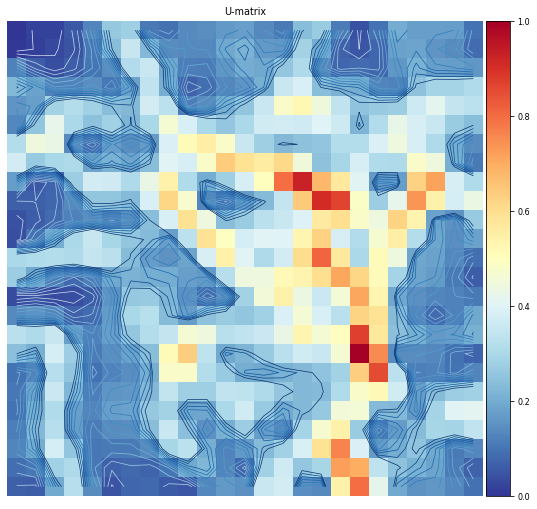

In [18]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som_wm_prodchar, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som_wm_prodchar, distance=1, row_normalized=True, contour=True, blob=False)

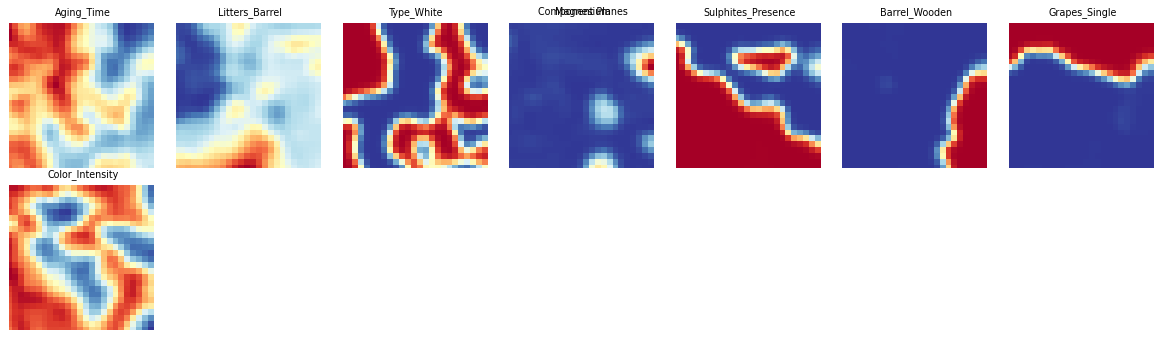

In [19]:
som_wm_prodchar.component_names = wm_prodchar.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, 'Component Planes', text_size=8)  
comp_planes.show(som_wm_prodchar, what='codebook', which_dim='all', col_sz=7.5) #which_dim='all' default

We choose 3 clusters because we found 3 seperated dark blue zones in the U-Matrix. (look into the U-Matrix and the component planes)

In [20]:
bmus = som_wm_prodchar.project_data(wm_prodchar_som)
bmus

array([ 78, 199, 219, ..., 149, 174, 198])

In [21]:
som_wm_prodchar.codebook.matrix

array([[ 1.438467, -1.361995,  0.9852  , ..., -0.473659,  1.495484,
         1.022313],
       [ 1.080833, -1.369781,  0.9852  , ..., -0.473656,  1.495484,
         1.021601],
       [ 0.698072, -1.315317,  0.985195, ..., -0.473569,  1.495484,
         0.919423],
       ...,
       [-0.343939,  0.004795, -0.693052, ...,  2.111222, -0.6646  ,
        -1.082303],
       [-0.467881,  0.069143, -0.341742, ...,  2.111224, -0.663627,
        -1.469606],
       [-0.53993 ,  0.148219, -0.050294, ...,  2.111224, -0.663372,
        -1.743764]])

<b><font size="5">Clusters with SOM- Option 1</font><a class="anchor"><a id='toc'></a></b>

<b><font size="5">wm_flavfeel </font><a class="anchor"><a id='toc'></a></b>

In [22]:
#first you can do clustering. Currently only K-means on top of the trained som
cl = som_wm_flavfeel.cluster(n_clusters=3)

In [23]:
labels = getattr(som_wm_flavfeel, 'cluster_labels')
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2,

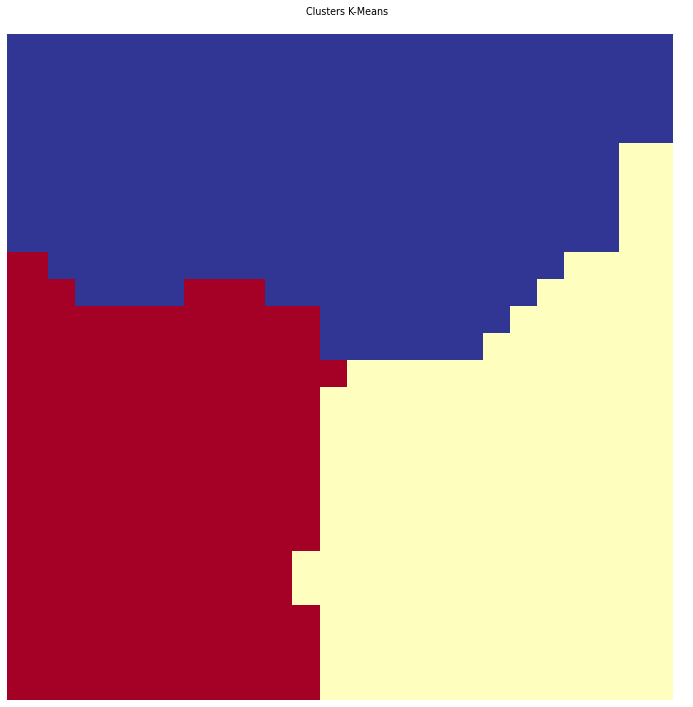

In [24]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8) 
v.show(som_wm_flavfeel, what='cluster')

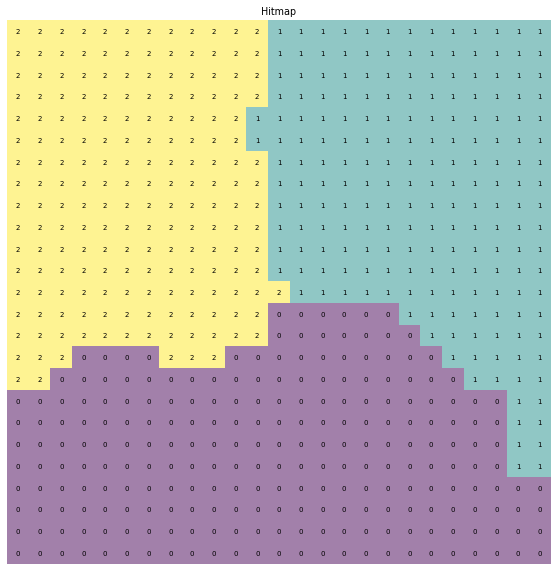

In [25]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som_wm_flavfeel)

In [26]:
bmus = som_wm_flavfeel.project_data(wm_flavfeel_som)
wm_flavfeel['bmu'] = bmus

In [27]:
wm_flavfeel['label'] = labels[wm_flavfeel['bmu']]

In [28]:
wm_flavfeel.head()

,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,Density,Cloudiness,Alcohol,Astringency,bmu,label
WineID,,,,,,,,,,,,,
0,0.000000,0.0,1.0,0.0,0.4,0.4,0.8,0.4,0.6,0.0,0.0,605,2
1,0.693182,0.8,0.4,0.0,0.6,0.0,0.4,0.4,0.8,0.0,0.0,549,1
2,0.000000,0.6,0.8,0.0,0.6,0.4,0.0,0.4,0.6,0.0,0.0,619,1
3,0.000000,0.0,0.8,0.0,0.6,0.6,0.8,0.6,0.2,0.0,0.0,605,2
4,0.000000,0.0,0.8,0.0,0.6,0.8,0.6,0.8,0.4,0.0,0.0,605,2


In [29]:
df_final_flavfeel = wm_cleaned.copy(deep=True)
df_final_flavfeel['label_c'] = wm_flavfeel['label']

In [30]:
df_final_flavfeel.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single,Satisfaction_General,label_c
WineID,,,,,,,,,,,,,,,,,,,,,
1,65,265,0,0.0,0,5,0,2,2,4,...,0,3,3,2,0,1,0,1,1,1.0
2,47,2464,310,305.0,4,2,0,3,0,2,...,0,4,3,2,1,0,0,1,1,1.0
3,15,2138,0,0.0,3,4,0,3,2,0,...,0,4,4,2,0,1,0,1,1,2.0
4,60,623,0,0.0,0,4,0,3,3,4,...,0,1,1,3,0,1,0,1,0,2.0
5,70,354,0,0.0,0,4,0,3,4,3,...,0,2,2,5,0,1,0,1,1,1.0


<b><font size="5">wm_prodchar </font><a class="anchor"><a id='toc'></a></b>

In [31]:
cl = som_wm_prodchar.cluster(n_clusters=3)

In [32]:
labels = getattr(som_wm_prodchar, 'cluster_labels')
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

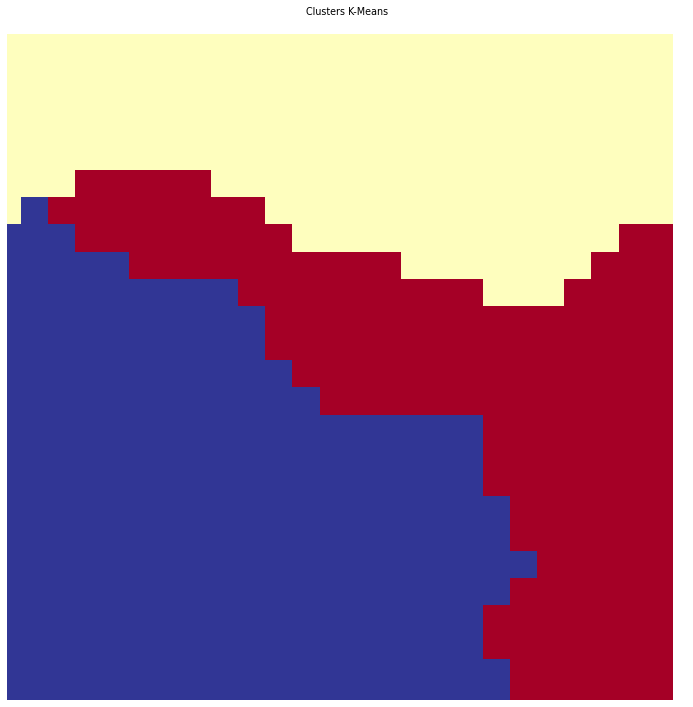

In [33]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8) 
v.show(som_wm_prodchar, what='cluster')

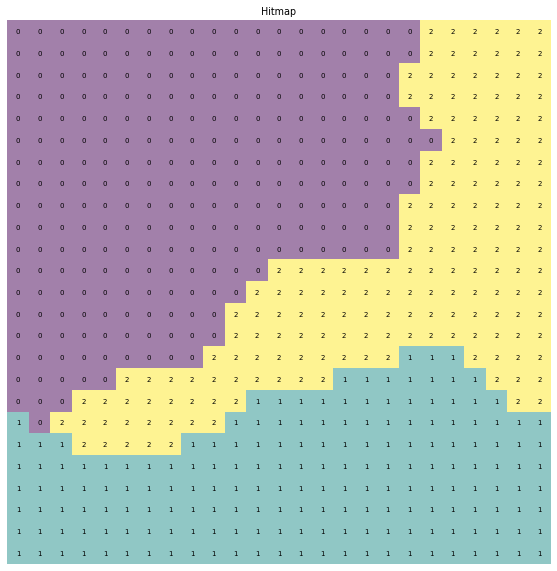

In [34]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som_wm_prodchar)

In [35]:
bmus = som_wm_prodchar.project_data(wm_prodchar_som)
wm_prodchar['bmu'] = bmus

In [36]:
wm_prodchar['label'] = labels[wm_prodchar['bmu']]

In [37]:
wm_prodchar.head()

,Aging_Time,Litters_Barrel,Type_White,Magnesium,Sulphites_Presence,Barrel_Wooden,Grapes_Single,Color_Intensity,bmu,label
WineID,,,,,,,,,,
0,0.743590,0.034003,1.0,0.000000,0.0,0.0,1.0,0.6,78,1
1,0.512821,0.381781,0.0,0.707763,1.0,0.0,1.0,0.6,199,2
2,0.102564,0.330223,1.0,0.000000,0.0,0.0,1.0,0.4,219,1
3,0.679487,0.090622,1.0,0.000000,0.0,0.0,1.0,0.2,81,1
4,0.807692,0.048078,1.0,0.000000,0.0,0.0,1.0,0.4,80,1


In [38]:
df_final_prodchar = df_final_flavfeel.copy(deep=True)
df_final_prodchar['label_b'] = wm_prodchar['label']

In [39]:
df_final_prodchar.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single,Satisfaction_General,label_c,label_b
WineID,,,,,,,,,,,,,,,,,,,,,
1,65,265,0,0.0,0,5,0,2,2,4,...,3,3,2,0,1,0,1,1,1.0,2.0
2,47,2464,310,305.0,4,2,0,3,0,2,...,4,3,2,1,0,0,1,1,1.0,1.0
3,15,2138,0,0.0,3,4,0,3,2,0,...,4,4,2,0,1,0,1,1,2.0,1.0
4,60,623,0,0.0,0,4,0,3,3,4,...,1,1,3,0,1,0,1,0,2.0,1.0
5,70,354,0,0.0,0,4,0,3,4,3,...,2,2,5,0,1,0,1,1,1.0,1.0


In [40]:
descr_together = df_final_prodchar.reset_index(drop=True)
descr_together = descr_together.groupby(['label_c','label_b'])[['Residual_Sugar', 'Acidity','Floral','Wood','Sweetness','Red_Fruit','Citric','Density','Cloudiness','Alcohol','Astringency','Aging_Time','Litters_Barrel','Type_White','Magnesium','Sulphites_Presence','Barrel_Wooden','Grapes_Single','Color_Intensity']].describe().T
descr_together

label_c                         0.0                                      1.0  \
label_b                         0.0           1.0          2.0           0.0   
Residual_Sugar  count  22774.000000  15989.000000  9448.000000  12454.000000   
                mean      13.524019     14.084245    14.320385     16.995102   
                std       33.986138     34.329967    36.348083     36.772312   
                min        0.000000      0.000000     0.000000      0.000000   
                25%        0.000000      0.000000     0.000000      0.000000   
...                             ...           ...          ...           ...   
Color_Intensity min        0.000000      1.000000     1.000000      0.000000   
                25%        4.000000      2.000000     3.000000      2.000000   
                50%        4.000000      4.000000     4.000000      2.000000   
                75%        5.000000      5.000000     5.000000      3.000000   
                max        5.000000      5.000000     5.000000      5.000000   

label_c                                                     2.0                \
label_b                         1.0           2.0           0.0           1.0   
Residual_Sugar  count  13370.000000  17089.000000  18521.000000  10241.000000   
                mean      14.859461     16.335245     14.020625     14.644566   
                std       35.351769     37.298440     34.870628     34.501591   
                min        0.000000      0.000000      0.000000      0.000000   
                25%        0.000000      0.000000      0.000000      0.000000   
...                             ...           ...           ...           ...   
Color_Intensity min        1.000000      0.000000      0.000000      1.000000   
                25%        2.000000      2.000000      4.000000      2.000000   
                50%        4.000000      3.000000      4.000000      4.000000   
                75%        5.000000      4.000000      5.000000      5.000000   
                max        5.000000      5.000000      5.000000      5.000000   

label_c                             
label_b                        2.0  
Residual_Sugar  count  8855.000000  
                mean     15.117448  
                std      36.159608  
                min       0.000000  
                25%       0.000000  
...                            ...  
Color_Intensity min       1.000000  
                25%       2.000000  
                50%       4.000000  
                75%       4.000000  
                max       5.000000  

[152 rows x 9 columns]

In [41]:
#It is to compare the 2 labels
descr_final = df_final_prodchar.reset_index(drop=True)
descr_final = descr_final.groupby(['label_c', 'label_b'])[['Residual_Sugar', 'Acidity','Floral','Wood','Sweetness','Red_Fruit','Citric','Density','Cloudiness','Alcohol','Astringency','Aging_Time','Litters_Barrel','Type_White','Magnesium','Sulphites_Presence','Barrel_Wooden','Grapes_Single','Color_Intensity']].agg(['mean','max', 'min'])
descr_final

Residual_Sugar               Acidity            Floral      \
                          mean    max  min      mean max min      mean max   
label_c label_b                                                              
0.0     0.0          13.524019  436.0  0.0  3.938702   5   1  3.512251   5   
        1.0          14.084245  432.0  0.0  3.575646   5   0  3.464694   5   
        2.0          14.320385  438.0  0.0  3.530694   5   1  3.474386   5   
1.0     0.0          16.995102  435.0  0.0  2.764815   5   0  2.868315   5   
        1.0          14.859461  440.0  0.0  3.472177   5   0  3.409798   5   
        2.0          16.335245  424.0  0.0  3.050793   5   0  3.029902   5   
2.0     0.0          14.020625  438.0  0.0  3.768695   5   0  3.463258   5   
        1.0          14.644566  417.0  0.0  3.476418   5   0  3.476907   5   
        2.0          15.117448  425.0  0.0  3.368605   5   1  3.266968   5   

                         Wood  ... Sulphites_Presence Barrel_Wooden          \
                min      mean  ...                min          mean max min   
label_c label_b                ...                                            
0.0     0.0       1  3.072495  ...                  0      0.003557   1   0   
        1.0       1  3.204140  ...                  0      0.000000   0   0   
        2.0       1  3.667443  ...                  0      0.633150   1   0   
1.0     0.0       0  2.915208  ...                  0      0.010438   1   0   
        1.0       1  2.601346  ...                  0      0.000000   0   0   
        2.0       1  2.595003  ...                  0      0.646439   1   0   
2.0     0.0       1  2.816155  ...                  0      0.016954   1   0   
        1.0       1  2.338151  ...                  0      0.000000   0   0   
        2.0       1  2.247995  ...                  0      0.671033   1   0   

                Grapes_Single         Color_Intensity          
                         mean max min            mean max min  
label_c label_b                                                
0.0     0.0          0.000659   1   0        4.194652   5   0  
        1.0          0.997436   1   0        3.426418   5   1  
        2.0          0.000000   0   0        3.497777   5   1  
1.0     0.0          0.001606   1   0        2.488036   5   0  
        1.0          0.990277   1   0        3.408751   5   1  
        2.0          0.010475   1   0        2.844227   5   0  
2.0     0.0          0.000432   1   0        3.956320   5   0  
        1.0          0.998242   1   0        3.450835   5   1  
        2.0          0.013213   1   0        3.325805   5   1  

[9 rows x 57 columns]

In [42]:
def clusters_scores(X, cluster_algorithm, score_function):
    range_n_clusters = [2, 3, 4, 5, 6]
    scores =[]
    
    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value
        clusterer = cluster_algorithm(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        score_avg = score_function(X, cluster_labels)
        scores.append(score_avg)

        print("For n_clusters =", n_clusters, "The average", score_function.__name__, "is :", score_avg)
    
    return scores

In [44]:
silhouette_score(wm_flavfeel, wm_flavfeel ['label'])

0.23140175078288575

In [45]:
silhouette_score(wm_prodchar, wm_prodchar ['label'])

0.26313585092616365